# CREDIT CARD FRAUD DETECTION -

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [6]:
df = pd.read_csv('creditcard.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.shape   # Rows - 283726 , columns = 31

(284807, 31)

In [12]:
df.info()    # exploring rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
x = df.iloc[:,1:30].values   # assigned the values of columns 1 to 29 in x 
y = df.iloc[:,30].values     # assigned the values of column 30 to y

In [16]:
print('Input Range:',x.shape)
print('Output Range:',y.shape)

Input Range: (284807, 29)
Output Range: (284807,)


In [18]:
df1 = df.copy()     # creating copy 

In [20]:
df.duplicated().sum()   # checking duplicates

1081

In [22]:
df.drop_duplicates(inplace=True)   # droping the duplicates

In [24]:
df.isnull().sum()   # checking null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [26]:
df.Class.value_counts()   # checking the value count of class

Class
0    283253
1       473
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

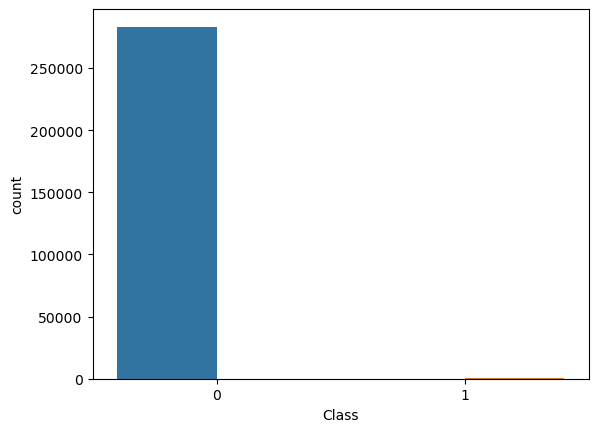

In [28]:
sns.countplot(x=df['Class'],hue=df['Class'])
plt.title('class Distribution of Transaction ')   
plt.show()   

In [30]:
# normal transaction - 0
# fraudulent transaction - 1

# Calculating the mean of imbalanced data

In [33]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


# Performing undersampling

In [50]:
%whos


Variable               Type         Data/Info
---------------------------------------------
dataframe_columns      function     <function dataframe_colum<...>ns at 0x00000230028E87C0>
dataframe_hash         function     <function dataframe_hash at 0x000002301909F740>
df                     DataFrame                Time         <...>283726 rows x 31 columns]
df1                    DataFrame                Time         <...>284807 rows x 31 columns]
dtypes_str             function     <function dtypes_str at 0x00000230028EBF60>
get_dataframes         function     <function get_dataframes at 0x000002301909F6A0>
getpass                module       <module 'getpass' from 'C<...>conda3\\Lib\\getpass.py'>
hashlib                module       <module 'hashlib' from 'C<...>conda3\\Lib\\hashlib.py'>
import_pandas_safely   function     <function import_pandas_s<...>ly at 0x000002301909D080>
is_data_frame          function     <function is_data_frame at 0x00000230028E89A0>
json                   mo

In [52]:
legit_transaction = df[df['Class'] == 0]


In [54]:
legit_transaction_sample = legit_transaction.sample(n=473)
legit_transaction_sample.shape


(473, 31)

In [58]:
fraud_transaction = df[df['Class'] == 1]


In [60]:
print(legit_transaction_sample.columns == fraud_transaction.columns)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


In [62]:
df = pd.concat([legit_transaction_sample,fraud_transaction],axis=0)    # concat 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
108886,71120.0,0.854555,-1.036422,0.500700,0.698712,-1.166085,-0.116175,-0.267995,-0.008144,-0.849884,...,-0.437836,-1.129365,-0.089390,0.276860,0.301894,-0.564008,0.020580,0.058523,219.42,0
63060,50539.0,-2.514891,0.433135,0.014455,-0.432482,-1.998951,0.132865,-0.077610,1.148167,0.522381,...,-0.114909,-0.128898,0.417214,-0.051977,-0.699306,0.671165,-0.180941,-0.114031,194.35,0
191806,129415.0,0.618606,0.786401,-2.672958,0.020681,3.075941,3.629842,0.062101,-1.024825,-0.704039,...,1.727217,0.053016,-0.090547,0.707946,0.247061,-0.389554,0.397034,0.341352,59.70,0
175413,122323.0,-0.201060,-0.027179,-1.223926,0.113830,0.764265,-0.611173,1.896642,-0.444546,-2.435352,...,0.265047,0.972096,0.141812,-0.409425,-0.076687,-0.220547,0.156555,0.225546,206.65,0
47676,43305.0,-1.647808,0.256453,1.346562,1.124777,-1.429680,0.849634,1.093247,0.755807,-0.531582,...,0.049085,-0.389701,0.666888,0.116939,0.358890,-0.396193,0.102788,0.090421,339.00,0


In [64]:
df.Class.value_counts()     # value count after undersampling

Class
0    473
1    473
Name: count, dtype: int64

# Checking mean for both the transaction after undersampling process

In [67]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91109.443975,0.085359,0.061890,0.035679,-0.019134,-0.075779,0.035722,0.066931,0.037917,0.065910,...,-0.020456,-0.022199,0.031303,-0.013660,-0.044645,0.002105,-0.034857,-0.025226,-0.009983,88.329197
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [69]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
108886,71120.0,0.854555,-1.036422,0.500700,0.698712,-1.166085,-0.116175,-0.267995,-0.008144,-0.849884,...,-0.437836,-1.129365,-0.089390,0.276860,0.301894,-0.564008,0.020580,0.058523,219.42,0
63060,50539.0,-2.514891,0.433135,0.014455,-0.432482,-1.998951,0.132865,-0.077610,1.148167,0.522381,...,-0.114909,-0.128898,0.417214,-0.051977,-0.699306,0.671165,-0.180941,-0.114031,194.35,0
191806,129415.0,0.618606,0.786401,-2.672958,0.020681,3.075941,3.629842,0.062101,-1.024825,-0.704039,...,1.727217,0.053016,-0.090547,0.707946,0.247061,-0.389554,0.397034,0.341352,59.70,0
175413,122323.0,-0.201060,-0.027179,-1.223926,0.113830,0.764265,-0.611173,1.896642,-0.444546,-2.435352,...,0.265047,0.972096,0.141812,-0.409425,-0.076687,-0.220547,0.156555,0.225546,206.65,0
47676,43305.0,-1.647808,0.256453,1.346562,1.124777,-1.429680,0.849634,1.093247,0.755807,-0.531582,...,0.049085,-0.389701,0.666888,0.116939,0.358890,-0.396193,0.102788,0.090421,339.00,0


# Spliting Data into X and Y

In [72]:
x = df.drop('Class',axis=1)
y = df['Class']

In [74]:
x.shape

(946, 30)

In [76]:
y.shape

(946,)

# Spliting data into Test and Train data

In [81]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(662, 30)
(284, 30)
(662,)
(284,)


# Model Building

In [86]:
from sklearn.linear_model import LogisticRegression

In [88]:
from  sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [90]:
def gen_and_eval_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Train acc',model.score(x_train,y_train))
    print('Test acc',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    cm = confusion_matrix(y_test,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,ypred))  

In [92]:
lr = LogisticRegression(max_iter=10000)
gen_and_eval_model(lr,x_train,x_test,y_train,y_test)

Train acc 0.9335347432024169
Test acc 0.9330985915492958
Confusion Matrix
 [[130  10]
 [  9 135]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       140
           1       0.93      0.94      0.93       144

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



# Evaluating the model

In [95]:
lr1 = LogisticRegression(max_iter=10000)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [97]:
print('Train Scr',lr1.score(x_train,y_train))
print('Test Scr',lr1.score(x_test,y_test))

Train Scr 0.9335347432024169
Test Scr 0.9330985915492958


In [99]:
ypred_lr1 = lr1.predict(x_test)
print(ypred_lr1)

[0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1
 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1]


In [101]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [103]:
acc_lr1 = accuracy_score(y_test,ypred_lr1)
pre_lr1 = precision_score(y_test,ypred_lr1)
rec_lr1 = recall_score(y_test,ypred_lr1)

lr1_res = pd.DataFrame({'Model':'LogReg_m1','Acc':acc_lr1,
                   'Precision':pre_lr1,'Recall':rec_lr1},index=[0])
lr1_res

,Model,Acc,Precision,Recall
0,LogReg_m1,0.933099,0.931034,0.9375


# ROC_AUC

In [108]:
from sklearn.metrics import roc_curve,roc_auc_score

In [110]:
ypred_lr1_prob = lr1.predict_proba(x_test)
print(ypred_lr1_prob[:10])

[[8.93595566e-01 1.06404434e-01]
 [9.95339205e-01 4.66079523e-03]
 [5.16282522e-02 9.48371748e-01]
 [9.86862650e-01 1.31373503e-02]
 [7.44958243e-01 2.55041757e-01]
 [0.00000000e+00 1.00000000e+00]
 [1.18893340e-10 1.00000000e+00]
 [9.29784770e-01 7.02152296e-02]
 [9.32526505e-01 6.74734945e-02]
 [0.00000000e+00 1.00000000e+00]]


In [112]:
print(ypred_lr1[:10])

[0 0 1 0 0 1 1 0 0 1]


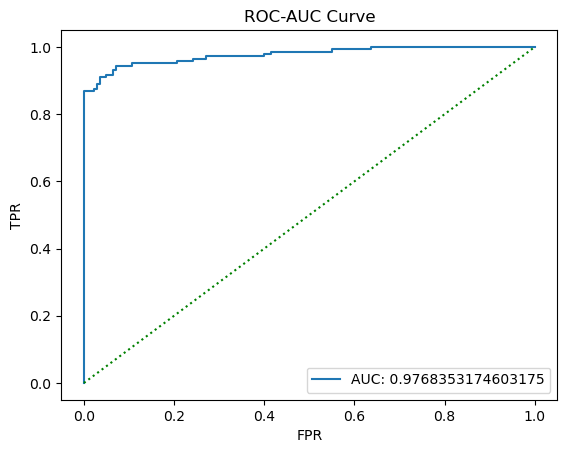

In [114]:
fpr,tpr,thresh = roc_curve(y_test,ypred_lr1_prob[:,1])
auc_score = roc_auc_score(y_test,ypred_lr1_prob[:,1])
plt.plot(fpr,tpr,label='AUC: '+str(auc_score))
plt.plot([0,1],[0,1],color='green',linestyle='dotted')
plt.title('ROC-AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# Best Threshold

In [117]:
best_thresh1 = thresh[np.argmax(tpr*(1-fpr))]
print(best_thresh1)

0.7764897161228789


In [119]:
best_thresh2 = thresh[np.argmax(abs(tpr-fpr))]
print(best_thresh2)

0.7764897161228789


In [121]:
ypred_lr2 = np.where(ypred_lr1_prob[:,1]>best_thresh2,1,0)
print(ypred_lr2)

[0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1
 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1]


In [123]:
acc_lr2 = accuracy_score(y_test,ypred_lr2)
pre_lr2 = precision_score(y_test,ypred_lr2)
rec_lr2 = recall_score(y_test,ypred_lr2)

lr2_res = pd.DataFrame({'Model':'LogReg_m2(Thresh=0.488)','Acc':acc_lr2,
                   'Precision':pre_lr2,'Recall':rec_lr2},index=[1])
lr2_res

,Model,Acc,Precision,Recall
1,LogReg_m2(Thresh=0.488),0.933099,0.962963,0.902778


In [125]:
res = pd.concat([lr1_res,lr2_res])
res

,Model,Acc,Precision,Recall
0,LogReg_m1,0.933099,0.931034,0.937500
1,LogReg_m2(Thresh=0.488),0.933099,0.962963,0.902778


# SUMMARY 